The purpose of this project is to analyze heart rate mortality data for different counties across the US for the year 2014. 
Mortality is defined here as the number of deaths per 100,000 population.
We will explore variations according to: 

1. Gender (Male or Female)
2. Ethnicity (White, Hispanic, Black, Asian)


In [1]:
import pandas as pd
import numpy as np



In [2]:
import os
os.path.isfile('/Users/Diwan/Heart_Disease_Mortality.csv')

True

In [3]:
os.getcwd()


'C:\\Users\\Diwan\\Downloads'

In [4]:
os.chdir('C:\\Users\\Diwan')

In [5]:
HDM = pd.read_csv("Heart_Disease_Mortality.csv")
HDM.head()

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,Data_Value_Footnote_Symbol,Data_Value_Footnote,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,TopicID,LocationID,Location 1
0,2014,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,105.3,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2013,"(55.440626, -161.962562)"
1,2014,AK,Aleutians West,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,211.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2016,"(52.995403, -170.251538)"
2,2014,AK,Anchorage,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,257.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2020,"(61.159049, -149.103905)"
3,2014,AK,Bethel,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,351.6,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2050,"(60.924483, -159.749655)"
4,2014,AK,Bristol Bay,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",~,Insufficient Data,Gender,Overall,Race/Ethnicity,Overall,T2,2060,"(58.754192, -156.694709)"


In [6]:
# Selecting only the columns we need

cols = ['LocationDesc', 'Data_Value', 'StratificationCategory1', 'Stratification1', 'StratificationCategory2','Stratification2'  ]
HDM = HDM[cols]

In [7]:
HDM.head()

,LocationDesc,Data_Value,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2
0,Aleutians East,105.3,Gender,Overall,Race/Ethnicity,Overall
1,Aleutians West,211.9,Gender,Overall,Race/Ethnicity,Overall
2,Anchorage,257.9,Gender,Overall,Race/Ethnicity,Overall
3,Bethel,351.6,Gender,Overall,Race/Ethnicity,Overall
4,Bristol Bay,NaN,Gender,Overall,Race/Ethnicity,Overall


In [8]:
# Replace the missing values using the average values from that column.

HDM = HDM.fillna(HDM.mean())


In [9]:
HDM.head()

,LocationDesc,Data_Value,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2
0,Aleutians East,105.300000,Gender,Overall,Race/Ethnicity,Overall
1,Aleutians West,211.900000,Gender,Overall,Race/Ethnicity,Overall
2,Anchorage,257.900000,Gender,Overall,Race/Ethnicity,Overall
3,Bethel,351.600000,Gender,Overall,Race/Ethnicity,Overall
4,Bristol Bay,349.306775,Gender,Overall,Race/Ethnicity,Overall


In [10]:
HDM.isnull().sum()


LocationDesc               0
Data_Value                 0
StratificationCategory1    0
Stratification1            0
StratificationCategory2    0
Stratification2            0
dtype: int64

In [11]:
HDM['Data_Value'].groupby([HDM['Stratification1']]).mean()


Stratification1
Female     312.287974
Male       393.153699
Overall    342.478651
Name: Data_Value, dtype: float64

In [12]:
HDM['Data_Value'].groupby([HDM['Stratification2']]).mean()


Stratification2
American Indian and Alaskan Native    359.088356
Asian and Pacific Islander            312.256516
Black                                 396.801695
Hispanic                              299.381472
Overall                               362.068167
White                                 366.244442
Name: Data_Value, dtype: float64

In [13]:
HDM['Data_Value'].groupby([HDM['LocationDesc']]).mean()


LocationDesc
Abbeville County    323.897079
Acadia Parish       435.097832
Accomack County     394.831165
Ada County          257.662993
Adair County        379.640887
                       ...    
Yukon-Koyukuk       337.792276
Yuma County         285.163369
Zapata County       322.653764
Zavala County       362.136721
Ziebach County      368.831165
Name: Data_Value, Length: 2015, dtype: float64

In [14]:
HDM['Data_Value'].groupby([HDM['Stratification1']]).describe()


,count,mean,std,min,25%,50%,75%,max
Stratification1,,,,,,,,
Female,19692.0,312.287974,78.111798,6.0,269.475000,349.306775,349.306775,1592.8
Male,19692.0,393.153699,116.624750,23.0,349.306775,349.306775,440.900000,1716.1
Overall,19692.0,342.478651,95.962088,12.6,317.300000,349.306775,357.125000,3000.9


In [16]:
#sorting the male data from highest number of deaths to lowest
Males = HDM[HDM['Stratification1'] == 'Male']
Males_sorted = Males.sort_values("Data_Value", ascending = False)
Males_sorted.head()

,LocationDesc,Data_Value,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2
28360,Sioux County,1716.1,Gender,Male,Race/Ethnicity,American Indian and Alaskan Native
25033,Lauderdale County,1700.0,Gender,Male,Race/Ethnicity,American Indian and Alaskan Native
24999,Attala County,1544.6,Gender,Male,Race/Ethnicity,American Indian and Alaskan Native
28320,Adams County,1537.5,Gender,Male,Race/Ethnicity,American Indian and Alaskan Native
39298,Campbell County,1503.2,Gender,Male,Race/Ethnicity,American Indian and Alaskan Native


In [17]:
#sorting the male data from lowest number of deaths to highest
Males_sorted = Males.sort_values("Data_Value")
Males_sorted.head()

,LocationDesc,Data_Value,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2
53683,Pitt County,23.0,Gender,Male,Race/Ethnicity,Hispanic
53199,Knox County,27.4,Gender,Male,Race/Ethnicity,Asian and Pacific Islander
59035,Woodbury County,45.2,Gender,Male,Race/Ethnicity,Hispanic
21505,Carver County,49.6,Gender,Male,Race/Ethnicity,Hispanic
34309,Love County,50.1,Gender,Male,Race/Ethnicity,Hispanic


In [18]:
#sorting the female data from highest number of deaths to lowest
Females = HDM[HDM['Stratification1'] == 'Female']
Females_sorted = Females.sort_values("Data_Value", ascending = False)
Females_sorted.head()

,LocationDesc,Data_Value,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2
15516,Cowley County,1592.8,Gender,Female,Race/Ethnicity,American Indian and Alaskan Native
25127,Neshoba County,1246.6,Gender,Female,Race/Ethnicity,American Indian and Alaskan Native
11851,Morgan County,986.8,Gender,Female,Race/Ethnicity,Black
17839,Franklin Parish,922.0,Gender,Female,Race/Ethnicity,White
17647,Franklin Parish,889.9,Gender,Female,Race/Ethnicity,Overall


In [19]:
#sorting the female data from lowest number of deaths to highest
Females_sorted = Females.sort_values("Data_Value")
Females_sorted.head()

,LocationDesc,Data_Value,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2
55580,Sebastian County,6.0,Gender,Female,Race/Ethnicity,Hispanic
56004,Fayette County,13.2,Gender,Female,Race/Ethnicity,Asian and Pacific Islander
56092,Spotsylvania County,15.4,Gender,Female,Race/Ethnicity,Hispanic
27176,Orange County,17.0,Gender,Female,Race/Ethnicity,Hispanic
58386,Alamance County,17.2,Gender,Female,Race/Ethnicity,Hispanic


We can see from the above tables that the highest number of deaths have been of American Indian and Alaskan Native population, and the lowest have been for the Hispanic population for males and females both. 

It can be safely concluded that in the American population, the American Indian and Alaskan Native population is at highest risk and the Hispanic population is at the lowest risk of dying from heart diseases.

In [27]:
grouped = HDM.groupby('Stratification2')
race_grouped = grouped['Data_Value']
race_mean_max = race_grouped.agg([np.mean, np.max])
race_mean_max

,mean,amax
Stratification2,,
American Indian and Alaskan Native,359.088356,3000.9
Asian and Pacific Islander,312.256516,945.2
Black,396.801695,1357.3
Hispanic,299.381472,968.7
Overall,362.068167,1328.3
White,366.244442,1324.1


Text(0, 0.5, '')

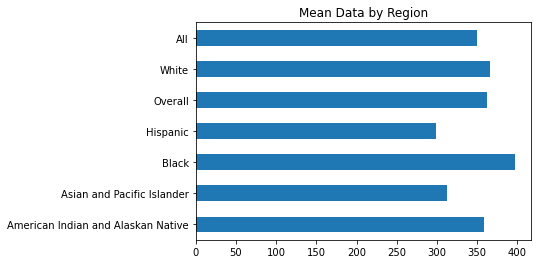

In [26]:
race = HDM.pivot_table(values='Data_Value', index='Stratification2', aggfunc=np.mean, margins=True)
race.plot(kind='barh', title='Mean Mortality Data', legend=False)
mean_value = HDM['Data_Value'].mean()
plt.ylabel(None)


Finding the mean of total deaths for the year 2014 shows that the most overall deaths have been for the Black population, followed by White and then American Indian and Alaskan Native. THe lowest number of deaths have been for Hispanic population. 

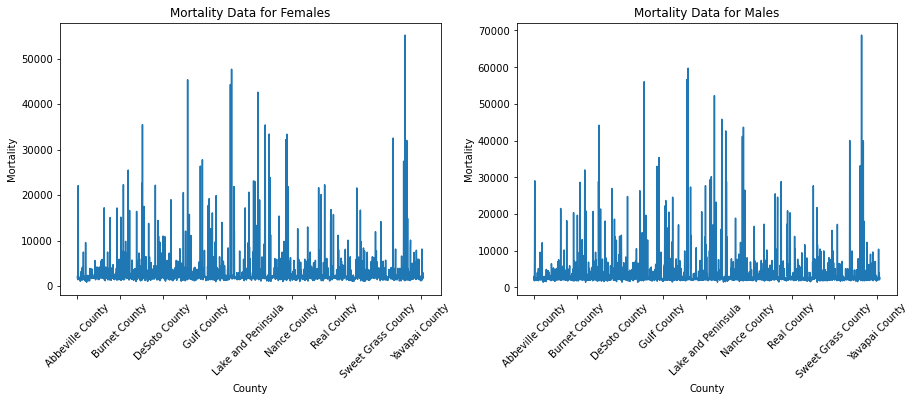

In [65]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
by_county = Females.groupby('LocationDesc').sum()
by_county['Data_Value'].plot.line()
plt.xticks(rotation=45)
plt.title('Mortality Data for Females')
plt.ylabel('Mortality')
plt.xlabel('County')

plt.subplot(1, 2, 2)
by_county = Males.groupby('LocationDesc').sum()
by_county['Data_Value'].plot.line()
plt.xticks(rotation=45)

plt.title('Mortality Data for Males')
plt.ylabel('Mortality')
plt.xlabel('County')

plt.show()

From the graphs we can see that mortality data varies across the counties for the two genders. The highest peaks for Males are higher than the highest peaks for females. We can also see from the highest peaks on the two graphs that for some counties, mortality is really high. 

Doing some research on counties provided some interesting facts. We can see that Orange County has one of the lowest mortality rate and median household income in 2007 was $ 61,899. Even though it is one of the most populated counties of California, indiciating that there may be a correlation between household income and mortality rate.

For Cowley county and Neshoba County, with one of the highest mortality rates, the median household income was found to be below $40,000, with around 20% of the population loving below the poverty line.


Conclusion:

It can be safely concluded that in the American population, the American Indian and Alaskan Native population is at highest risk and the Hispanic population is at the lowest risk of dying from heart diseases.

Men are more at risk of dying from Heart disease than women.